In [53]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [20]:
df = pd.read_excel('dados/Todos os resultados da Mega Sena  Rede Loteria.xlsx')
df.columns = df.iloc[0,:]
df = df.drop(0)

colunas = ['Conc', 'Data', '1a_dezena','2a_dezena','3a_dezena','4a_dezena', '5a_dezena','6a_dezena', 'Gan.', 'Premio','Apostas']
df.columns = colunas

df['1a_dezena'] = df['1a_dezena'].astype(int)
df['2a_dezena'] = df['2a_dezena'].astype(int)
df['3a_dezena'] = df['3a_dezena'].astype(int)
df['4a_dezena'] = df['4a_dezena'].astype(int)
df['5a_dezena'] = df['5a_dezena'].astype(int)
df['6a_dezena'] = df['6a_dezena'].astype(int)

df.head()

,Conc,Data,1a_dezena,2a_dezena,3a_dezena,4a_dezena,5a_dezena,6a_dezena,Gan.,Premio,Apostas
1,2669,16/12/2023,4,7,16,35,46,54,0,NaN,8163974
2,2668,14/12/2023,1,27,30,41,46,57,0,NaN,6123188
3,2667,12/12/2023,1,4,8,21,46,51,0,NaN,5403236
4,2666,09/12/2023,5,25,29,30,43,47,1,30781665.32,10479456
5,2665,07/12/2023,3,14,21,22,37,39,0,NaN,8471087


In [10]:
df.isnull().sum()

Conc            0
Data            0
1a_dezena       0
2a_dezena       0
3a_dezena       0
4a_dezena       0
5a_dezena       0
6a_dezena       0
Gan.            0
Premio       2065
Apostas      2202
dtype: int64

In [38]:
df1 = df.drop(['Conc','Data','Premio','Apostas'], axis=1)

In [28]:
df1.duplicated().sum()

0

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 1 to 2669
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1a_dezena  2669 non-null   int32 
 1   2a_dezena  2669 non-null   int32 
 2   3a_dezena  2669 non-null   int32 
 3   4a_dezena  2669 non-null   int32 
 4   5a_dezena  2669 non-null   int32 
 5   6a_dezena  2669 non-null   int32 
 6   Gan.       2669 non-null   object
dtypes: int32(6), object(1)
memory usage: 83.5+ KB


In [40]:
df1['Gan.'] = df1['Gan.'].astype(int) 
df1['Gan'] = np.where(df1['Gan.'] >= 1, 1, 0)
df1 = df1.drop('Gan.', axis=1)
df1.head()

,1a_dezena,2a_dezena,3a_dezena,4a_dezena,5a_dezena,6a_dezena,Gan
1,4,7,16,35,46,54,0
2,1,27,30,41,46,57,0
3,1,4,8,21,46,51,0
4,5,25,29,30,43,47,1
5,3,14,21,22,37,39,0


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 1 to 2669
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1a_dezena  2669 non-null   int32
 1   2a_dezena  2669 non-null   int32
 2   3a_dezena  2669 non-null   int32
 3   4a_dezena  2669 non-null   int32
 4   5a_dezena  2669 non-null   int32
 5   6a_dezena  2669 non-null   int32
 6   Gan        2669 non-null   int32
dtypes: int32(7)
memory usage: 73.1 KB


### Seleção de features

In [42]:
# Target (variável resposta)
y = df1['Gan']

# Features (variáveis explicativas)
x = df1.drop('Gan', axis = 1)

x.head()

,1a_dezena,2a_dezena,3a_dezena,4a_dezena,5a_dezena,6a_dezena
1,4,7,16,35,46,54
2,1,27,30,41,46,57
3,1,4,8,21,46,51
4,5,25,29,30,43,47
5,3,14,21,22,37,39


### Treino e teste

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [44]:
x_train.shape

(1868, 6)

In [46]:
x_test.shape

(801, 6)

### Treinando o modelo

In [48]:
modelo_arvore = DecisionTreeClassifier(max_depth=2, 
                                       min_samples_leaf=5,
                                       random_state=42)
modelo_arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

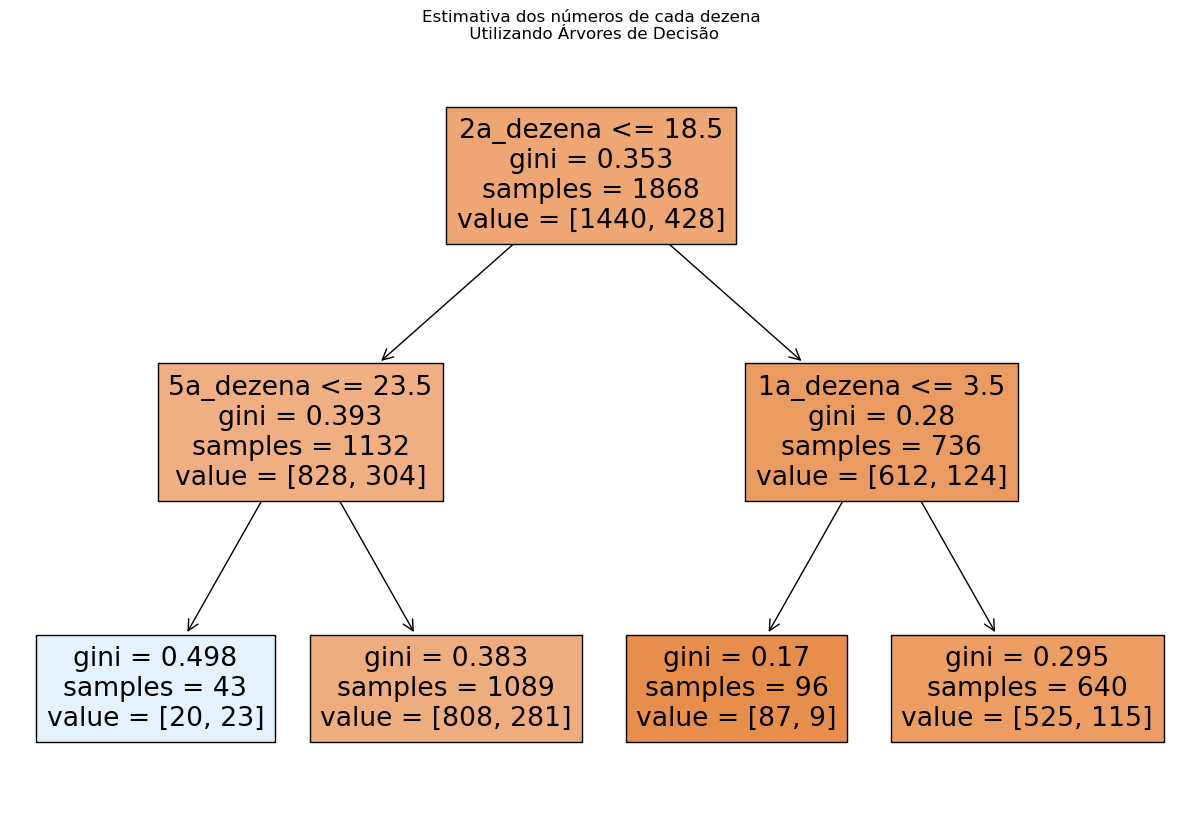

In [55]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_arvore,
               feature_names=features,
               filled=True);
plt.title("Estimativa dos números de cada dezena\n Utilizando Árvores de Decisão");

#### Desempenho no treino

In [57]:
accuracy_score(y_train, modelo_arvore.predict(x_train)).round(2)

0.77

#### Desempenho no teste

In [58]:
accuracy_score(y_test, modelo_arvore.predict(x_test)).round(2)

0.77

### Criação da função para facilitar o processo

In [75]:
def treina_arvore_classificacao(x_train, y_train, x_test, y_test, max_d, min_s):

    modelo = DecisionTreeClassifier(max_depth=max_d,
                                   min_samples_leaf=min_s,
                                   random_state=42)
    modelo.fit(x_train, y_train)
    
    y_pred_train = modelo.predict(x_train)
    y_pred_test = modelo.predict(x_test)
    
    # Cálculo do Desempenho
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    return modelo, (accuracy_train, accuracy_test)

In [76]:
treina_arvore_classificacao(x_train, y_train, x_test, y_test, 2, 5)

(DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42),
 (0.7724839400428265, 0.7740324594257179))

In [85]:
modelo_lista = list()
max_d = list()
min_s = list()
accuracy_train = list()
accuracy_test = list()

for d in range(1, 10):
    for s in range(1, 31):
        max_d.append(d)
        min_s.append(s)
        modelo, accuracy = treina_arvore_classificacao(x_train, y_train, 
                                     x_test, y_test, 
                                     d, s)
        
        modelo_lista.append(modelo)
        accuracy_train.append(accuracy[0])
        accuracy_test.append(accuracy[1])
        
busca_ad = pd.DataFrame(list(zip(max_d, min_s, accuracy_train, accuracy_test, modelo_lista)), 
                        columns=['Max Depth', 'Min Samples Leaf', 
                                 'Accuracy Train', 'Accuracy Test', 'Modelo'])
busca_ad['Diferença'] = busca_ad['Accuracy Test'] - busca_ad['Accuracy Train']
busca_ad

,Max Depth,Min Samples Leaf,Accuracy Train,Accuracy Test,Modelo,Diferença
0,1,1,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, random_sta...",0.009397
1,1,2,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
2,1,3,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
3,1,4,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
4,1,5,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
...,...,...,...,...,...,...
265,9,26,0.772484,0.774032,"DecisionTreeClassifier(max_depth=9, min_sample...",0.001549
266,9,27,0.772484,0.774032,"DecisionTreeClassifier(max_depth=9, min_sample...",0.001549
267,9,28,0.772484,0.774032,"DecisionTreeClassifier(max_depth=9, min_sample...",0.001549
268,9,29,0.772484,0.774032,"DecisionTreeClassifier(max_depth=9, min_sample...",0.001549


In [86]:
busca_ad.loc[
    (busca_ad['Diferença'] > -0.05) &
    (busca_ad['Diferença'] <  0.05) &
    (busca_ad['Accuracy Test'] > 0.58)
    ].sort_values(by=['Diferença', 'Accuracy Test', 'Max Depth', 'Min Samples Leaf'],
                  ascending=[True, False, True, True])

,Max Depth,Min Samples Leaf,Accuracy Train,Accuracy Test,Modelo,Diferença
215,8,6,0.793897,0.744070,"DecisionTreeClassifier(max_depth=8, min_sample...",-0.049827
186,7,7,0.791756,0.742821,"DecisionTreeClassifier(max_depth=7, min_sample...",-0.048934
214,8,5,0.796039,0.747815,"DecisionTreeClassifier(max_depth=8, min_sample...",-0.048223
185,7,6,0.791756,0.745318,"DecisionTreeClassifier(max_depth=7, min_sample...",-0.046438
217,8,8,0.792291,0.746567,"DecisionTreeClassifier(max_depth=8, min_sample...",-0.045724
...,...,...,...,...,...,...
25,1,26,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
26,1,27,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
27,1,28,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397
28,1,29,0.770878,0.780275,"DecisionTreeClassifier(max_depth=1, min_sample...",0.009397


In [89]:
modelo_selecionado = busca_ad.loc[215]['Modelo']

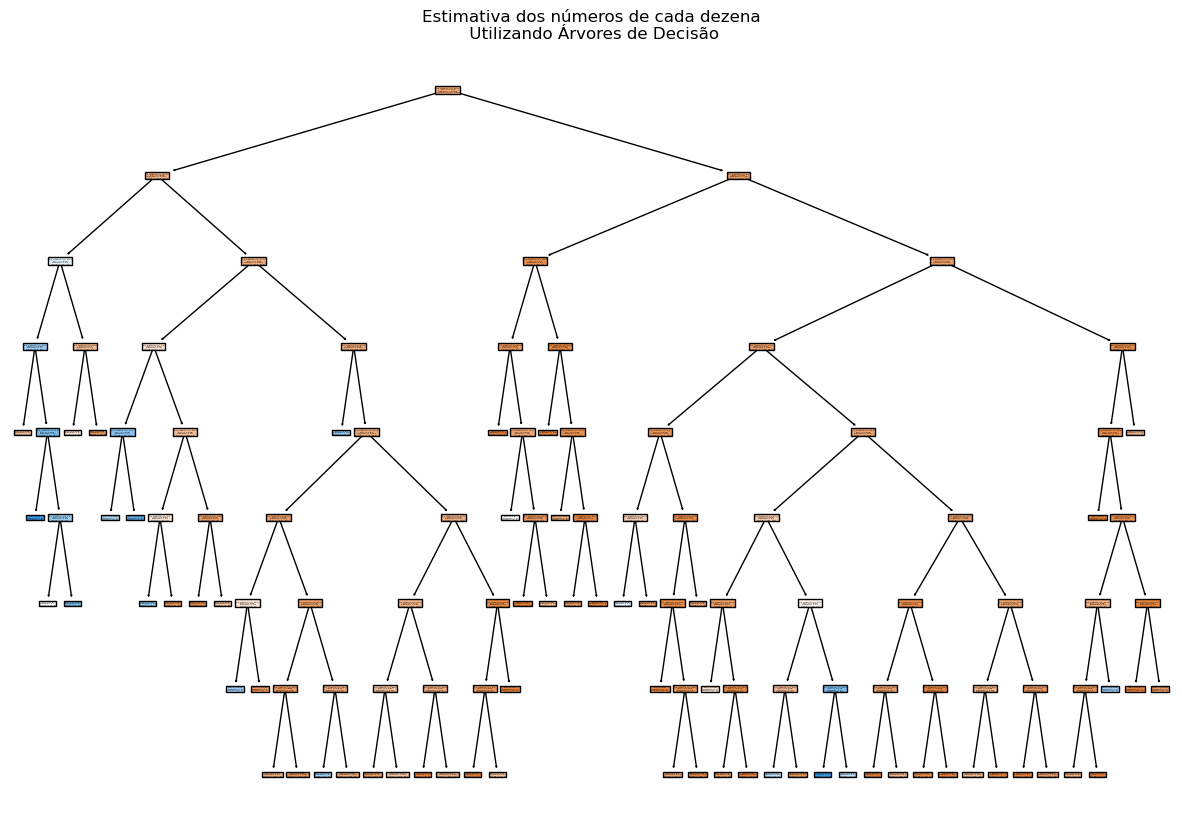

In [90]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_selecionado,
               feature_names=features,
               filled=True);
plt.title("Estimativa dos números de cada dezena\n Utilizando Árvores de Decisão");

In [91]:
def analise_hiperparametro(hp):
    sns.set()

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    fig.suptitle(t='Análise do Hiperparâmetro: '+hp, fontsize=12)

    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['Accuracy Train'])
    sns.lineplot(ax=axes[0], x=busca_ad[hp], y=busca_ad['Accuracy Test'])
    axes[0].legend(labels=['Treino', 'Teste'])

    sns.lineplot(ax=axes[1], x=busca_ad[hp], y=busca_ad['Diferença'])

    fig.tight_layout()    

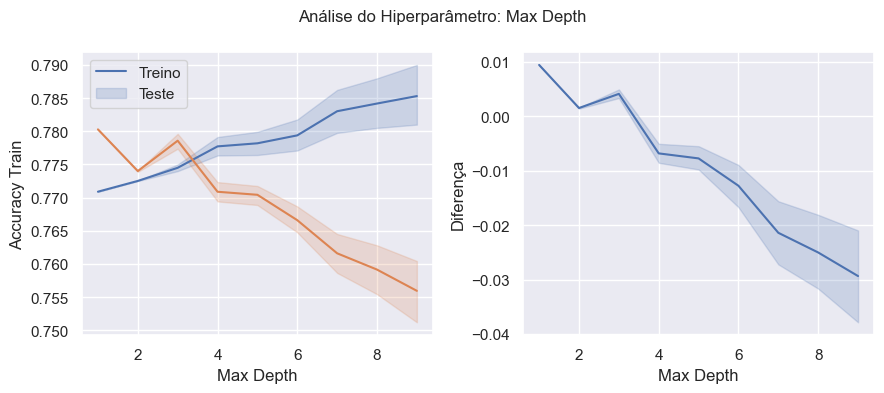

In [92]:
analise_hiperparametro('Max Depth')

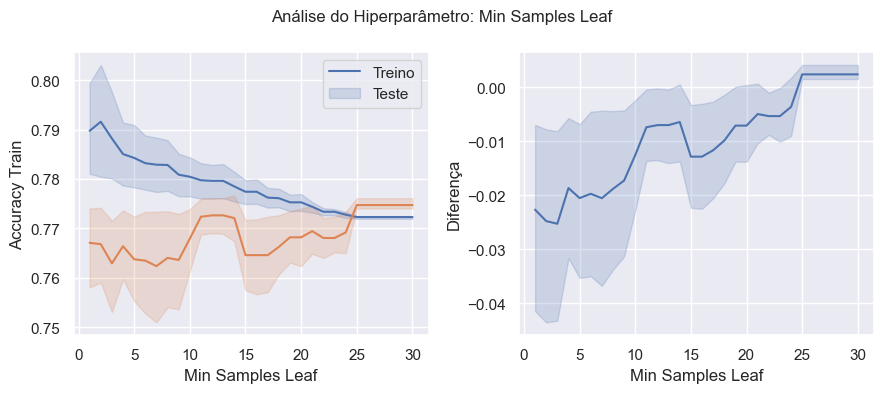

In [93]:
analise_hiperparametro('Min Samples Leaf')

In [101]:
entrada = np.array([[3, 7, 15, 21, 24, 59]])
previsao = modelo_arvore.predict(entrada)
probabilidades = modelo_selecionado.predict_proba(entrada)

# Imprima as probabilidades
print("Probabilidade da classe 0:", probabilidades[0, 0])
print("Probabilidade da classe 1:", probabilidades[0, 1])
# Adapte conforme o número de classes no seu problema

# Se quiser fazer uma decisão com base nas probabilidades, pode definir um limiar
limiar = 0.5  # Exemplo de limiar para decidir entre as classes
if probabilidades[0, 1] > limiar:
    print("Sim")
else:
    print("Não")

Probabilidade da classe 0: 0.3333333333333333
Probabilidade da classe 1: 0.6666666666666666
Sim


C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [114]:
# Exemplo de dados de entrada para classificação (uma única entrada)
nova_entrada = np.array([[1, 2, 3, 4, 5, 6]])  # Substitua pelos valores reais

# Obtenha as probabilidades associadas à classe 1 para cada valor da entrada
probabilidades_classe1 = modelo_arvore.predict_proba(nova_entrada)[:, 1]

# Imprima as probabilidades para cada valor da entrada
for i, prob in enumerate(probabilidades_classe1):
    print(f"Probabilidade do valor {nova_entrada[0, i]}: {prob * 100:.2f}%")

Probabilidade do valor 1: 53.49%


C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [110]:
probabilidades_classe1[0]

0.5348837209302325

In [116]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Suponha que você já tenha treinado seu modelo de árvore de decisão
# e o tenha armazenado na variável 'modelo_arvore'

# Exemplo de dados de entrada para classificação (uma única entrada)
nova_entrada = np.array([[3, 7, 15, 21, 24, 59]])  # Substitua pelos valores reais

# Obtenha as probabilidades associadas a cada valor da entrada para a classe 1
probabilidades_classe1 = []

for valor in nova_entrada[0]:
    entrada_temporaria = np.zeros_like(nova_entrada)
    entrada_temporaria[0, nova_entrada[0] == valor] = 1  # Configura o valor específico para 1
    probabilidade = modelo_sel.predict_proba(entrada_temporaria)[:, 1][0]
    probabilidades_classe1.append(probabilidade)

# Imprima as probabilidades para cada valor da entrada
for valor, prob in zip(nova_entrada[0], probabilidades_classe1):
    print(f"Probabilidade do valor {valor}: {prob * 100:.2f}%")


Probabilidade do valor 3: 53.49%
Probabilidade do valor 7: 53.49%
Probabilidade do valor 15: 53.49%
Probabilidade do valor 21: 53.49%
Probabilidade do valor 24: 53.49%
Probabilidade do valor 59: 53.49%


C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
C:\Users\Ben-Hur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeCla